Dynamic Table

Enter the max size of the list (greater than 5): 7


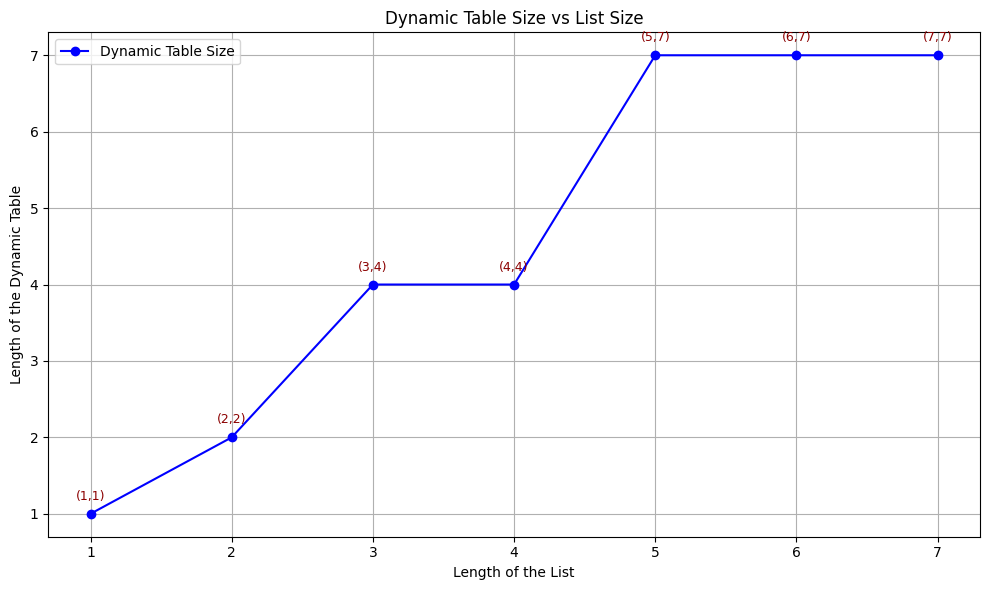

In [ ]:
import random as rnd
import matplotlib.pyplot as plt  # type: ignore

def fibonacci(n):

    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        a, b = 0, 1
        for _ in range(n - 1):
            a, b = b, a + b
        return b

def DynamicTable(A):
    cur_len = 0
    j = 0
    Fj = fibonacci(j)
    cur_len += Fj

    DT = []
    i = 0

    while i < len(A):
        if len(DT) >= cur_len:
            j += 1
            Fj = fibonacci(j)
            cur_len += Fj
        DT.append(A[i])
        i += 1

    return cur_len

if __name__ == '__main__':
    n = int(input("Enter the max size of the list (greater than 5): "))
    list_lengths = []
    DT_lengths = []

    for i in range(1, n + 1):
        A = [rnd.randint(0, 25) for _ in range(i)]
        list_lengths.append(i)

        length = DynamicTable(A)
        DT_lengths.append(length)

    plt.figure(figsize=(10, 6))
    plt.plot(list_lengths, DT_lengths, marker='o', linestyle='-', color='b', label='Dynamic Table Size')
    plt.xlabel("Length of the List")
    plt.ylabel("Length of the Dynamic Table")
    plt.title("Dynamic Table Size vs List Size")
    plt.grid(True)

    for x, y in zip(list_lengths, DT_lengths):
        plt.annotate(f'({x},{y})', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='darkred')

    plt.legend()
    plt.tight_layout()
    plt.show()


Average increments: 9.67


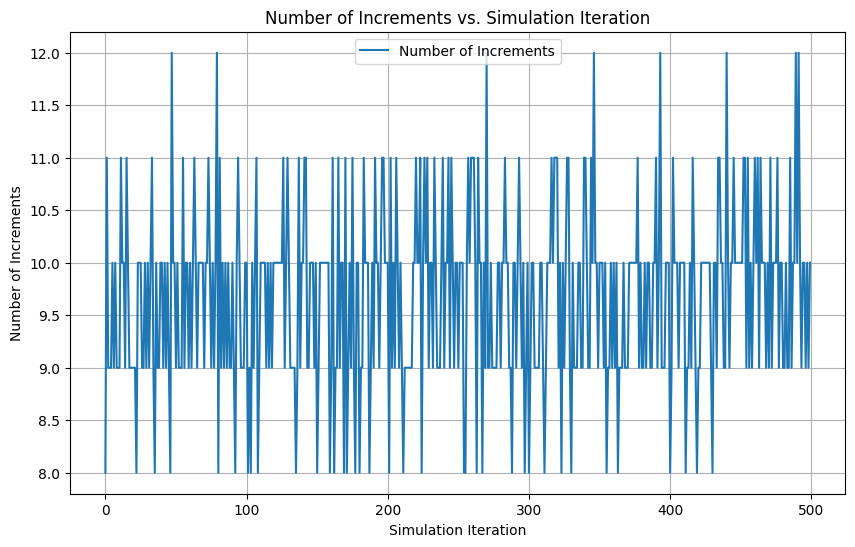

In [ ]:
#Probabilistic Counting


import random
import numpy as np
import matplotlib.pyplot as plt


def create_fibonacci_sequence(length):
    if length <= 0:
        return []
    elif length == 1:
        return [1]

    fib_seq = [1, 2]

    for _ in range(2, length):
        fib_seq.append(fib_seq[-1] + fib_seq[-2])

    return fib_seq


def biased_coin_flip(lower_bound, upper_bound):

    probability_heads = 1 / (upper_bound - lower_bound)

    random_value = random.random()

    return 1 if random_value < probability_heads else 0



num_bits = 5
fib_length = 32


power_of_twos = [2 ** i for i in range(20)]
increments_list = []  # To store the number of increments for each simulation

for _ in range(500):
    current_index = 0
    counter_list = [0] * num_bits
    increment_count = 0

    for _ in range(1000):
        if biased_coin_flip(power_of_twos[current_index], power_of_twos[current_index + 1]):
            position = 0
            while counter_list[position] == 1:
                counter_list[position] = 0
                position += 1
            counter_list[position] = 1
            current_index += 1
            increment_count += 1

    increments_list.append(increment_count)


average_increments = np.mean(increments_list)

print(f"Average increments: {average_increments}")


plt.figure(figsize=(10, 6))
plt.plot(range(len(increments_list)), increments_list, label='Number of Increments')
plt.xlabel('Simulation Iteration')
plt.ylabel('Number of Increments')
plt.title('Number of Increments vs. Simulation Iteration')
plt.legend()
plt.grid(True)
plt.show()

Bitreverse counter

In [ ]:
def bit_reversal_permutation(A):
    n = len(A)
    k = int(math.log2(n))  # Calculate k such that n = 2^k

    def revk(a):
        result = 0
        for i in range(k):
            if (a >> i) & 1:
                result |= 1 << (k - 1 - i)
        return result

    for i in range(n):
        rev_i = revk(i)
        if i < rev_i:
            A[i], A[rev_i] = A[rev_i], A[i]

# Example usage
import math

A = [1, 2, 3, 4, 5, 6, 7, 8]
bit_reversal_permutation(A)
print(A)


[1, 5, 3, 7, 2, 6, 4, 8]


MAKING BINARY SEARCH DYNAMIC

In [ ]:
import math

def initialize_arrays(n, A):

    k = math.floor(math.log2(n + 1)) + 1
    print(k)
    arrays = [[] for _ in range(k)]

    bit_positions = [i for i in range(k) if (n & (1 << i)) != 0]

    print(bit_positions)

    A.sort()
    #print("sorted array: ",sorted_arrays)
    current_index = 0;
    #populating array[i]

    for i in bit_positions:
        length = 2**i
        arrays[i] = A[current_index : current_index + length]
        current_index += length

    return arrays
A = []
A = input("Enter array element: ").split()
n = len(A)
arrays = initialize_arrays(n,A)
for i, array in enumerate(arrays):
    print(f"A[{i}]: {array}")


Enter array element:  3 5 5 6 34 22 11
4
[0, 1, 2]
A[0]: ['11']
A[1]: ['22', '3']
A[2]: ['34', '5', '5', '6']
A[3]: []


SEARCH

In [ ]:
def binary_search(arr, target):

    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

def find_bit_positions_with_elements(A):
    """ Find all bit positions with a non-empty sub-array. """
    positions = []
    for bit_position in range(len(A)):
        if A[bit_position]:
            positions.append(bit_position)
    return positions


def find_element_in_bit_positions(A, target):

    bit_positions = find_bit_positions_with_elements(A)


    for bit_position in bit_positions:
        sub_array = A[bit_position]
        index = binary_search(sub_array, target)

        if index != -1:
            print(f"Element {target} found at bit position {bit_position} in sorted sub-array.")
            return

    print(f"Element {target} not found in any bit position sub-array.")
target = input("target :")
find_element_in_bit_positions(A, target)


target :5
Element 5 found at bit position 4 in sorted sub-array.


Bitincrement counter

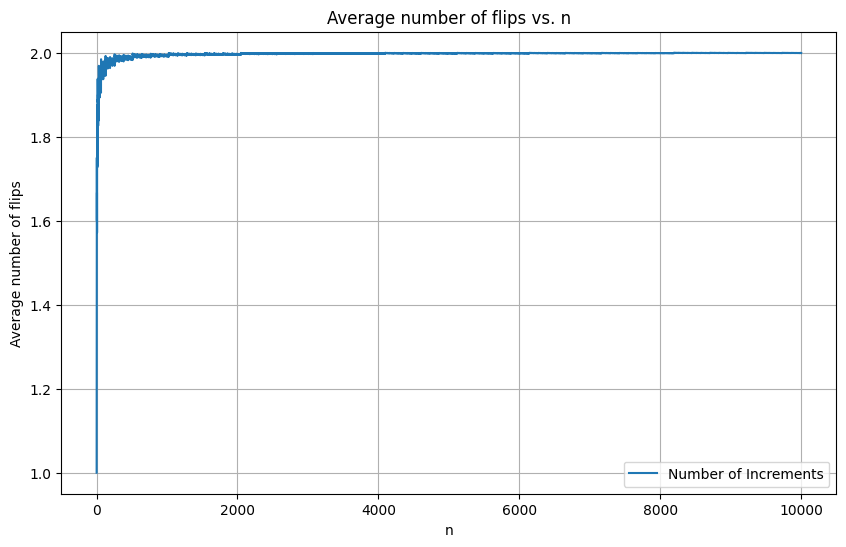

In [ ]:
import random
import numpy
import matplotlib.pyplot as plt


def bit_increment(arr):
    i = 0
    while i < len(arr) and arr[i] == 1:
        arr[i] = 0
        i+=1
    if i < len(arr):
        arr[i] = 1
        i+=1
    return i


arr = [0]*20 #Assuming 20 bits are there in my array



sum = 0

flips = []
for i in range(1,10000):
    sum += bit_increment(arr)
    flips.append(sum/i)

plt.figure(figsize=(10, 6))
plt.plot(range(1,10000), flips, label='Number of Increments')
plt.xlabel('n')
plt.ylabel('Average number of flips')
plt.title('Average number of flips vs. n')
plt.legend()
plt.grid(True)
plt.show()
